In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
path = os.path.dirname(os.path.dirname(os.path.abspath('timeline_forecasting.ipynb')))
print(path)
data_df = pd.read_csv(f'{path}/dataset_generator/timeline_data/2001_A_SPACE_ODYSSEY_complete_data.csv')
print(data_df.head())

C:\Users\Simon\git\Machine-Learning-And-Art
      (0, 0, 0)   (0, 0, 128)  (0, 0, 255)  (0, 128, 0)  (0, 128, 128)  \
0  12288.000000   8192.000000  8192.000000  8192.000000    4096.000000   
1   7505.429961  10757.975751  7499.952662  3977.831383    7230.377173   
2  10912.968796   7363.017830  7196.464308  7499.062417    3949.111451   
3   8323.071239   5070.476565  4784.671805  6780.990138    3528.395464   
4  11616.441575   7521.809818  7521.768727  7584.629608    3489.997851   

   (0, 128, 255)  (0, 255, 0)  (0, 255, 128)  (0, 255, 255)  (128, 0, 0)  ...  \
0    4096.000000  8192.000000    4096.000000    4096.000000  8192.000000  ...   
1    3972.354084  3737.794528    6990.340318    3732.317229  4036.280725  ...   
2    3782.557929  7275.241437    3725.290472    3558.736950  7714.658442  ...   
3    3242.590704  5625.798474    2373.203800    2087.399040  7148.977666  ...   
4    3489.956761  7558.260985    3463.629228    3463.588137  8471.234697  ...   

   object_id_71  object_

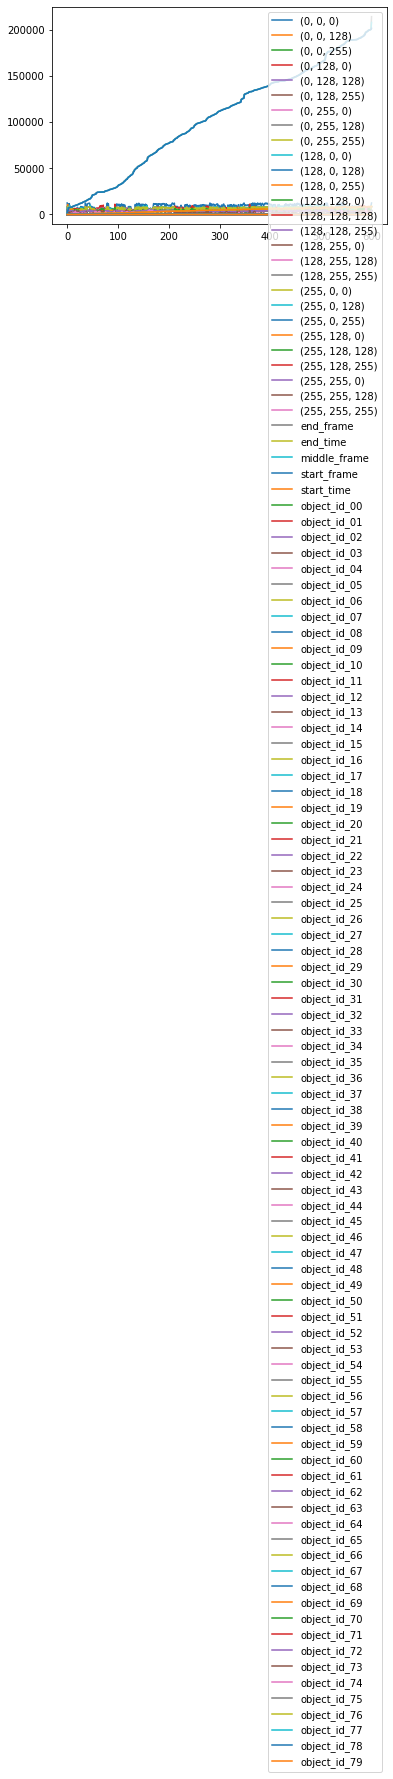

In [3]:
plt.close("all")
data_df.plot()
plt.show()

<AxesSubplot:>

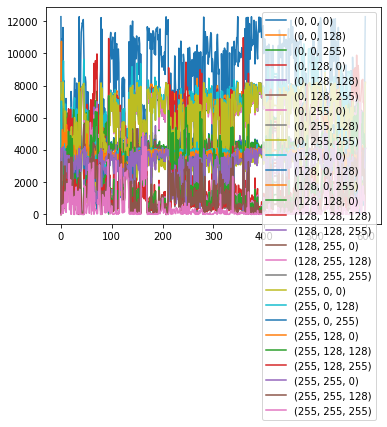

In [4]:
colors_df = data_df[["(0, 0, 0)","(0, 0, 128)","(0, 0, 255)","(0, 128, 0)","(0, 128, 128)","(0, 128, 255)","(0, 255, 0)","(0, 255, 128)","(0, 255, 255)","(128, 0, 0)","(128, 0, 128)","(128, 0, 255)","(128, 128, 0)","(128, 128, 128)","(128, 128, 255)","(128, 255, 0)","(128, 255, 128)","(128, 255, 255)","(255, 0, 0)","(255, 0, 128)","(255, 0, 255)","(255, 128, 0)","(255, 128, 128)","(255, 128, 255)","(255, 255, 0)","(255, 255, 128)","(255, 255, 255)"]]
colors_df.plot()

<AxesSubplot:>

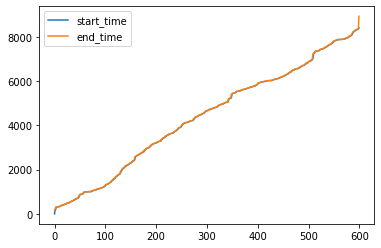

In [5]:
times = data_df[["start_time", "end_time"]]
times.plot()

<AxesSubplot:>

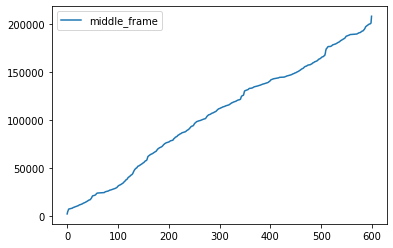

In [6]:
middle_frames = data_df[["middle_frame"]]
middle_frames.plot()

In [7]:
#numerical_df = data_df.drop(columns=["end_frame","end_time","img_path","length","middle_frame","start_frame","start_time","filename","object_labels"])
numerical_df = colors_df
print(numerical_df)

        (0, 0, 0)   (0, 0, 128)  (0, 0, 255)  (0, 128, 0)  (0, 128, 128)  \
0    12288.000000   8192.000000  8192.000000  8192.000000    4096.000000   
1     7505.429961  10757.975751  7499.952662  3977.831383    7230.377173   
2    10912.968796   7363.017830  7196.464308  7499.062417    3949.111451   
3     8323.071239   5070.476565  4784.671805  6780.990138    3528.395464   
4    11616.441575   7521.809818  7521.768727  7584.629608    3489.997851   
..            ...           ...          ...          ...            ...   
595   1766.042645   2925.556608  2102.804141  3593.847198    4753.361162   
596   1762.087031   3542.371246  1629.606765  3669.510251    5449.794466   
597   3086.233043   4134.452948  2508.728301  4112.678978    5160.898882   
598   9522.650460   6465.149833  6888.664821  6881.877095    3824.376468   
599  12288.000000   8192.000000  8192.000000  8192.000000    4096.000000   

     (0, 128, 255)  (0, 255, 0)  (0, 255, 128)  (0, 255, 255)  (128, 0, 0)  \
0      40

<AxesSubplot:>

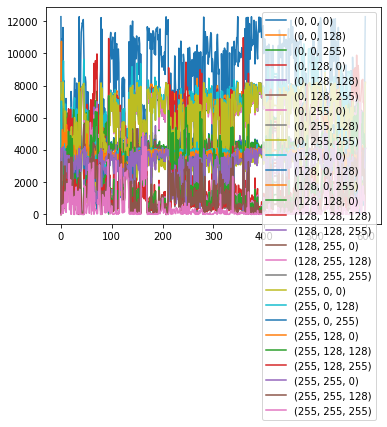

In [8]:
numerical_df.plot()

<AxesSubplot:>

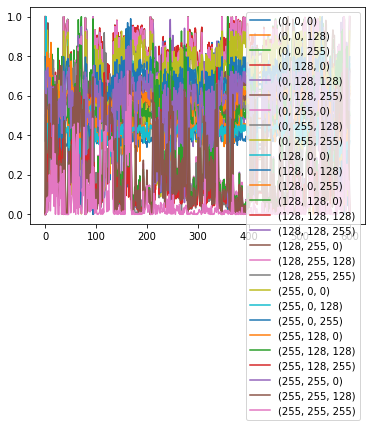

In [9]:
x = numerical_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled, columns=numerical_df.columns)
scaled_df.plot()

In [10]:
column_indices = {name: i for i, name in enumerate(scaled_df.columns)}

n = len(scaled_df)
train_df = scaled_df[0:int(n*0.7)]
test_df = scaled_df[int(n*0.7):]

num_features = scaled_df.shape[1]

In [11]:
def create_dataset(X, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i: (i + time_steps)].to_numpy()
        Xs.append(v)
        ys.append(X.iloc[i + time_steps].to_numpy())
    return np.array(Xs), np.array(ys)

In [12]:
TIME_STEPS = 10

X_train, y_train = create_dataset(train_df, time_steps=TIME_STEPS)
X_test, y_test = create_dataset(test_df, time_steps=TIME_STEPS)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(410, 10, 27) (410, 27)
(170, 10, 27) (170, 27)


In [14]:
for i in range(5):
    print(X_train[i])

[[1.         0.73401086 1.         1.         0.4969319  0.72207972
  1.         0.58022878 0.64695175 0.76092593 0.37119851 0.45969359
  0.50222505 0.         0.         0.61133232 0.         0.
  0.92721061 0.45242799 0.7974127  0.62746608 0.         0.
  0.72362958 0.         0.        ]
 [0.61079345 1.         0.91527083 0.44791976 0.97175122 0.69552768
  0.44837741 1.         0.58858108 0.34753481 0.85645862 0.44653653
  0.         0.34250239 0.06821978 0.         0.48080708 0.04666648
  0.41998139 1.         0.73470787 0.         0.47134367 0.04508195
  0.         0.60600615 0.00233749]
 [0.88809967 0.64807853 0.87811396 0.90922121 0.47468011 0.65477037
  0.88646578 0.52646413 0.56072164 0.71344227 0.38164098 0.43994767
  0.53089037 0.06836894 0.07920679 0.60828649 0.0719574  0.06391294
  0.83777839 0.40964313 0.71768357 0.61205945 0.06060873 0.05017745
  0.66715499 0.04221316 0.00880312]
 [0.67733327 0.41043362 0.58283189 0.81514962 0.41094684 0.53881645
  0.68219366 0.33036865 

  0.39266686 0.35250915 0.10545391]]


In [15]:
for i in range(5):
    print(y_train[i])

[0.58626165 0.51939399 0.56966985 0.74087694 0.65382355 0.63429987
 0.56884806 0.51238122 0.34003737 0.57431801 0.54411152 0.39779176
 0.67444501 0.38644298 0.3795062  0.56767191 0.37417644 0.22978598
 0.57613576 0.44618919 0.50039214 0.63710093 0.41207708 0.28628348
 0.46704737 0.29038708 0.01782221]
[0.44413317 0.2959113  0.35753749 0.72626562 0.57490205 0.61331891
 0.4635621  0.32969912 0.20580783 0.48227074 0.34124668 0.21384565
 0.77379112 0.41377682 0.47758383 0.56303824 0.3143069  0.22709401
 0.55155507 0.33043032 0.46029623 0.86974743 0.54782417 0.538693
 0.58835163 0.34100972 0.11751018]
[0.50369253 0.36083602 0.53945887 0.5436971  0.34780186 0.47597657
 0.55489861 0.42135573 0.44519867 0.44097235 0.2621077  0.28223002
 0.41810395 0.17281384 0.23537404 0.4976284  0.24397828 0.28818532
 0.58947826 0.37199387 0.67797291 0.57577941 0.29275331 0.35541578
 0.64781852 0.38344195 0.27328548]
[0.22333831 0.13531619 0.14993435 0.52783018 0.52175581 0.50654182
 0.26531132 0.26632852 0.1

In [16]:
for i in range(5):
    print(X_test[i])

[[0.69398168 0.48476632 0.63156807 0.67810535 0.3301149  0.35572611
  0.62218064 0.33441747 0.27785248 0.81356221 0.65769701 0.71805172
  0.75875982 0.29033085 0.35024383 0.80918663 0.35428594 0.35284157
  0.76166756 0.43738428 0.65960264 0.60560241 0.16393399 0.10858192
  0.59445394 0.1163436  0.00340565]
 [0.69477667 0.48529609 0.63211902 0.67848884 0.32985268 0.35522327
  0.62263433 0.3342732  0.27759481 0.81405609 0.6577436  0.71799036
  0.75849707 0.28973576 0.3492751  0.80900445 0.35349412 0.351705
  0.7630041  0.43867464 0.66087506 0.60638122 0.16394749 0.10849225
  0.59542994 0.11649848 0.00343802]
 [0.69371347 0.48467031 0.63125287 0.67800942 0.33036292 0.35572374
  0.62199579 0.33454465 0.27772867 0.81184975 0.65544072 0.71472317
  0.7567086  0.28921243 0.34835529 0.80672494 0.35250504 0.35023653
  0.7619615  0.43829889 0.66026027 0.60643944 0.16493775 0.10960813
  0.59522733 0.11758802 0.00413179]
 [0.69560452 0.48535834 0.63217872 0.67999438 0.33014355 0.35561136
  0.623836

In [17]:
for i in range(5):
    print(y_test[i])

[0.932851   0.70726905 0.94637612 0.94496118 0.51920445 0.71499637
 0.93421528 0.58544365 0.62383123 0.70080562 0.36554106 0.41585432
 0.47431279 0.03349033 0.02545567 0.56174633 0.03505276 0.01360056
 0.85195802 0.43644097 0.74395269 0.586854   0.04278222 0.02443853
 0.65982554 0.03848119 0.00399298]
[9.03349093e-01 6.40229548e-01 8.76715027e-01 8.80890523e-01
 4.02063201e-01 5.65637989e-01 8.76435894e-01 4.76559863e-01
 5.15814119e-01 7.71314210e-01 4.30073724e-01 5.17231591e-01
 5.55828914e-01 6.06313549e-02 7.64033579e-02 6.58344790e-01
 7.88250870e-02 8.42323296e-02 8.84997477e-01 4.36917587e-01
 7.60092611e-01 6.13074548e-01 2.61537636e-02 1.63085500e-02
 6.92281855e-01 1.97016203e-02 5.99493618e-04]
[0.83062972 0.64040483 0.83241218 0.88176058 0.53869107 0.68124723
 0.82729823 0.54885717 0.53747299 0.67296677 0.41587896 0.42501796
 0.54344651 0.13410153 0.13649842 0.57978133 0.13390885 0.09130057
 0.77454039 0.4251228  0.67428198 0.6034998  0.13837821 0.09952016
 0.6102384  0.09

In [18]:
model = tf.keras.Sequential()
model.add(
    layers.Bidirectional(
        layers.LSTM(
            units=128,
            input_shape=(X_train[1], X_train[2])
        )
    )
)
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=y_train.shape[1]))

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/30
11/11 [==============================] - 1s 122ms/step - loss: 0.1140 - val_loss: 0.0429
Epoch 2/30
11/11 [==============================] - 0s 9ms/step - loss: 0.0527 - val_loss: 0.0383
Epoch 3/30
11/11 [==============================] - 0s 9ms/step - loss: 0.0388 - val_loss: 0.0284
Epoch 4/30
11/11 [==============================] - 0s 10ms/step - loss: 0.0344 - val_loss: 0.0280
Epoch 5/30
11/11 [==============================] - 0s 9ms/step - loss: 0.0330 - val_loss: 0.0272
Epoch 6/30
11/11 [==============================] - 0s 9ms/step - loss: 0.0319 - val_loss: 0.0266
Epoch 7/30
11/11 [==============================] - 0s 9ms/step - loss: 0.0303 - val_loss: 0.0261
Epoch 8/30
11/11 [==============================] - 0s 9ms/step - loss: 0.0293 - val_loss: 0.0264
Epoch 9/30
11/11 [==============================] - 0s 9ms/step - loss: 0.0283 - val_loss: 0.0257
Epoch 10/30
11/11 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0258
Epoch 11/30
11/1

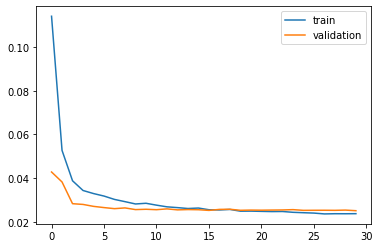

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

In [22]:
y_pred = model.predict(X_test)

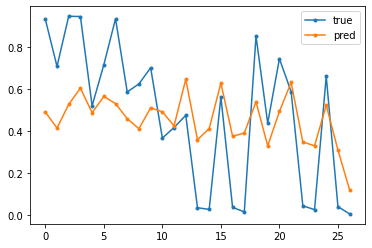

In [23]:
plt.plot(y_test[0], marker='.',label='true')
plt.plot(y_pred[0], marker='.',label='pred')
plt.legend()

<AxesSubplot:>

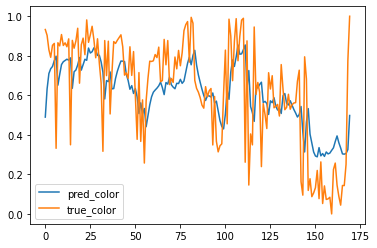

In [24]:
pred_difference = y_test - y_pred
pred_df = pd.DataFrame()
for i in range(len(y_test)):
    sample = {'true_color': y_test[i][0],
             'pred_color': y_pred[i][0]}
    pred_df = pred_df.append(sample, ignore_index=True)
pred_df.plot()

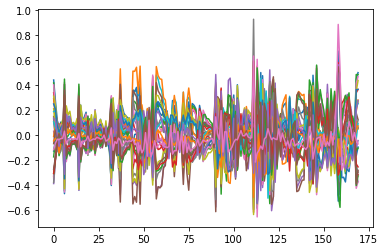

In [26]:
plt.plot(pred_difference)

In [27]:
y_pred_train = model.predict(X_train)

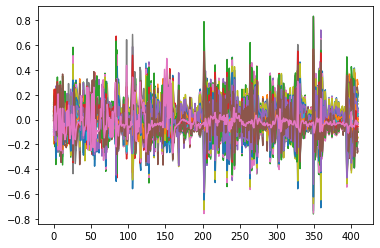

In [28]:
pred_train_difference = y_train - y_pred_train
plt.plot(pred_train_difference)